In [1]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2))) # plotting
suppressPackageStartupMessages(suppressWarnings(library(dplyr))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(patchwork))) # figure composition
suppressPackageStartupMessages(suppressWarnings(library(cowplot))) # figure composition
suppressPackageStartupMessages(suppressWarnings(library(RcppTOML))) # parsing config file
suppressPackageStartupMessages(suppressWarnings(library(pheatmap))) # heatmap
suppressPackageStartupMessages(suppressWarnings(library(lattice))) # heatmap
suppressPackageStartupMessages(suppressWarnings(library(RColorBrewer))) # heatmap
suppressPackageStartupMessages(suppressWarnings(library(gplots))) # heatmap
suppressPackageStartupMessages(suppressWarnings(library(ComplexHeatmap))) # heatmap
suppressPackageStartupMessages(suppressWarnings(library(ggplotify))) # grob
suppressPackageStartupMessages(suppressWarnings(library(viridis))) # color
suppressPackageStartupMessages(suppressWarnings(library(platetools))) # make plate plot
suppressPackageStartupMessages(suppressWarnings(library(circlize))) 
suppressPackageStartupMessages(suppressWarnings(library(reshape2))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(stringr))) # string manipulation
suppressPackageStartupMessages(suppressWarnings(library(purrr))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(VennDiagram))) # venn diagram
suppressPackageStartupMessages(suppressWarnings(library(tidyverse))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(ggvenn))) # venn diagram
suppressPackageStartupMessages(suppressWarnings(library(grid))) # grid
source("../utils/figure_themes.r")


In [2]:
cell_type <- "PBMC"


In [3]:
montage_image_path = file.path("figures/Montage.png")
montage_image = png::readPNG(montage_image_path)


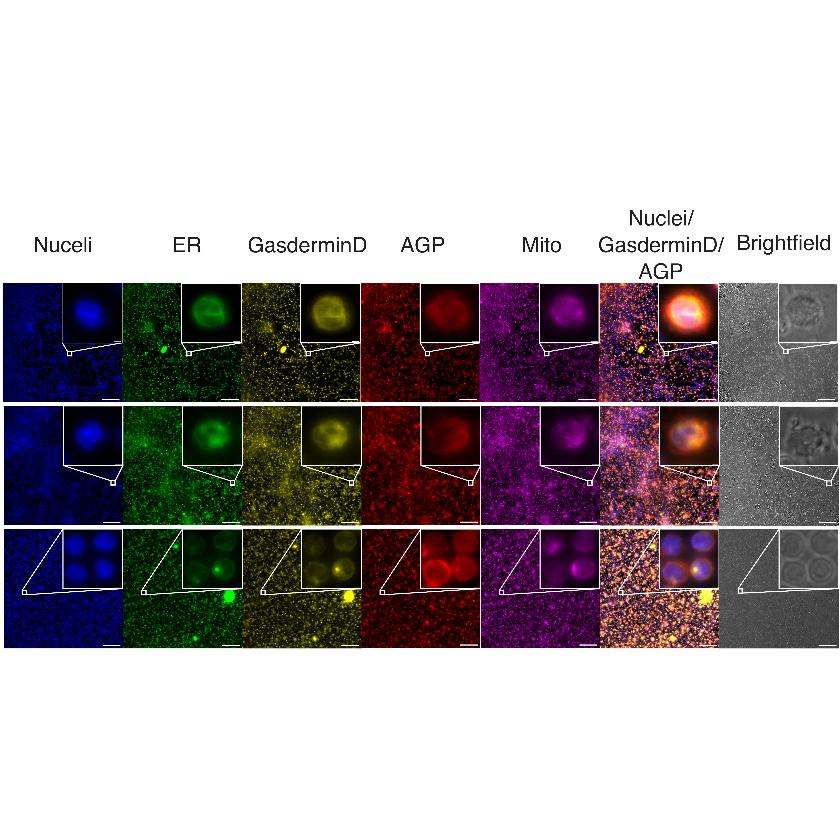

In [4]:
# plot the montage image to a ggplot object
montage <- (
    ggplot()
    + annotation_custom(
        rasterGrob(montage_image, interpolate = TRUE),
        xmin=-Inf, xmax=Inf, ymin=-Inf, ymax=Inf
    )
    + theme_void()
)
montage


In [5]:
# set path to anova results
anova_results_path = file.path(paste0(
    "../../1.Exploratory_Data_Analysis/results/",cell_type,"_anova_results_all_treatments.parquet"
))
# read in path
anova_results = arrow::read_parquet(anova_results_path)


In [6]:
# create a column that adds group1 and group2 together
anova_results$group = paste0(anova_results$group1,"_",anova_results$group2)
print(nrow(anova_results))
print(ncol(anova_results))


[1] 3753
[1] 12


In [7]:
# filter out rows that have p-adj_abs > 0.05
anova_results = anova_results %>% filter(`p-adj_abs` < 0.05)
print(nrow(anova_results))
print(ncol(anova_results))


[1] 1753
[1] 12


In [8]:
# change the group names to replace healhty with    control
anova_results$group = str_replace_all(anova_results$group,"healthy","control")
anova_results


group1    group2     meandiff lower  upper   p-adj   reject
1    apoptosis healthy     0.0017  0.9562 -0.0192  0.0225 FALSE 
2    apoptosis pyroptosis -0.0547  0.0000 -0.0758 -0.0337  TRUE 
3    healthy   pyroptosis -0.0564  0.0000 -0.0651 -0.0477  TRUE 
4    apoptosis healthy    -0.0436  0.0000 -0.0662 -0.0209  TRUE 
5    apoptosis pyroptosis -0.0428  0.0000 -0.0656 -0.0200  TRUE 
6    healthy   pyroptosis  0.0008  0.9533 -0.0087  0.0102 FALSE 
7    apoptosis healthy     0.0262  0.0001  0.0039  0.0485  TRUE 
8    healthy   pyroptosis  0.0396  0.0000  0.0303  0.0489  TRUE 
9    apoptosis healthy    -0.0043  0.7986 -0.0287  0.0200 FALSE 
10   apoptosis healthy    -0.0102  0.2434 -0.0329  0.0125 FALSE 
11   apoptosis pyroptosis -0.0124  0.1269 -0.0353  0.0105 FALSE 
12   healthy   pyroptosis -0.0022  0.6773 -0.0117  0.0073 FALSE 
13   healthy   pyroptosis  0.0060  0.0567 -0.0034  0.0154 FALSE 
14   apoptosis healthy     0.0254  0.0001  0.0031  0.0478  TRUE 
15   healthy   pyroptosis  0.0150  0.0000  0.0056  0.0244  TRUE 
16   apoptosis healthy    -0.0109  0.1855 -0.0332  0.0114 FALSE 
17   apoptosis pyroptosis -0.0213  0.0019 -0.0438  0.0011 FALSE 
18   healthy   pyroptosis -0.0104  0.0002 -0.0198 -0.0011  TRUE 
19   healthy   pyroptosis  0.0136  0.0000  0.0042  0.0231  TRUE 
20   apoptosis pyroptosis  0.0106  0.2003 -0.0115  0.0327 FALSE 
21   healthy   pyroptosis -0.0272  0.0000 -0.0364 -0.0181  TRUE 
22   healthy   pyroptosis  0.0335  0.0000  0.0240  0.0430  TRUE 
23   healthy   pyroptosis  0.0046  0.1799 -0.0047  0.0139 FALSE 
24   apoptosis healthy    -0.0140  0.0697 -0.0368  0.0087 FALSE 
25   apoptosis pyroptosis  0.0124  0.1299 -0.0106  0.0353 FALSE 
26   healthy   pyroptosis  0.0264  0.0000  0.0169  0.0360  TRUE 
27   healthy   pyroptosis  0.0175  0.0000  0.0080  0.0270  TRUE 
28   healthy   pyroptosis  0.0118  0.0000  0.0024  0.0212  TRUE 
29   apoptosis healthy     0.0027  0.9061 -0.0204  0.0259 FALSE 
30   healthy   pyroptosis  0.0335  0.0000  0.0238  0.0432  TRUE 
⋮    ⋮         ⋮          ⋮        ⋮      ⋮       ⋮       ⋮     
1724 healthy   pyroptosis -0.0509  0.0000 -0.0610 -0.0408  TRUE 
1725 healthy   pyroptosis -0.0451  0.0000 -0.0551 -0.0351  TRUE 
1726 healthy   pyroptosis  0.0122  0.0000  0.0026  0.0218  TRUE 
1727 healthy   pyroptosis  0.0084  0.0049 -0.0012  0.0179 FALSE 
1728 apoptosis healthy    -0.0345  0.0000 -0.0578 -0.0112  TRUE 
1729 apoptosis pyroptosis  0.0117  0.1743 -0.0118  0.0352 FALSE 
1730 apoptosis healthy    -0.0163  0.0333 -0.0396  0.0070 FALSE 
1731 apoptosis pyroptosis  0.0197  0.0075 -0.0038  0.0432 FALSE 
1732 healthy   pyroptosis  0.0360  0.0000  0.0262  0.0457  TRUE 
1733 apoptosis healthy    -0.0511  0.0000 -0.0746 -0.0277  TRUE 
1734 apoptosis pyroptosis -0.0068  0.5631 -0.0304  0.0169 FALSE 
1735 apoptosis healthy    -0.0256  0.0002 -0.0488 -0.0024  TRUE 
1736 apoptosis pyroptosis  0.0134  0.1009 -0.0100  0.0367 FALSE 
1737 healthy   pyroptosis  0.0390  0.0000  0.0293  0.0487  TRUE 
1738 healthy   pyroptosis -0.0494  0.0000 -0.0589 -0.0399  TRUE 
1739 healthy   pyroptosis -0.0498  0.0000 -0.0592 -0.0403  TRUE 
1740 healthy   pyroptosis -0.0459  0.0000 -0.0554 -0.0364  TRUE 
1741 healthy   pyroptosis -0.0385  0.0000 -0.0478 -0.0292  TRUE 
1742 healthy   pyroptosis -0.0228  0.0000 -0.0325 -0.0130  TRUE 
1743 healthy   pyroptosis -0.0165  0.0000 -0.0263 -0.0067  TRUE 
1744 apoptosis pyroptosis  0.0245  0.0006  0.0009  0.0480  TRUE 
1745 healthy   pyroptosis -0.0241  0.0000 -0.0339 -0.0143  TRUE 
1746 healthy   pyroptosis -0.0259  0.0000 -0.0357 -0.0161  TRUE 
1747 healthy   pyroptosis  0.0353  0.0000  0.0254  0.0452  TRUE 
1748 apoptosis healthy    -0.0168  0.0215 -0.0393  0.0058 FALSE 
1749 apoptosis pyroptosis -0.0226  0.0011 -0.0453  0.0002 FALSE 
1750 healthy   pyroptosis -0.0058  0.0712 -0.0153  0.0036 FALSE 
1751 apoptosis healthy    -0.0059  0.4636 -0.0237  0.0119 FALSE 
1752 apoptosis pyroptosis -0.0229  0.0000 -0.0408 -0.0050  TRUE 
1753 healthy   pyroptosis -0.0170  0.000

In [9]:
# create the three df sets for a venn diagram
a_h <- anova_results %>% filter(group == "apoptosis_control")
a_p <- anova_results %>% filter(group == "apoptosis_pyroptosis")
h_p <- anova_results %>% filter(group == "control_pyroptosis")
a_h <- a_h %>% select(features)
a_p <- a_p %>% select(features)
h_p <- h_p %>% select(features)

# create a list of the three df sets
a_h_list <- a_h %>% pull(features)
a_p_list <- a_p %>% pull(features)
h_p_list <- h_p %>% pull(features)

x=list(a_h_list,a_p_list,h_p_list)


In [10]:
# set plot size 
width <- 10
height <- 10
options(repr.plot.width=width, repr.plot.height=height)
myCol <- brewer.pal(3, "Dark2")
venn_diagram_plot <- venn.diagram(
    x=x,
    show=TRUE,
    category.names = c("Apoptosis \nvs \nControl","Apoptosis \nvs \nPyroptosis","Control \nvs \nPyroptosis"),
    filename = paste0("figures/",cell_type,"_venn_diagram.png"),
    # Output features
    imagetype="png" , 
    resolution = 600,
    compression = "lzw",
    
    # Circles
    lwd = 2,
    lty = 'blank',
    fill = myCol,
    
    # Numbers
    cex = 1,
    fontface = "bold",
    fontfamily = "sans",
    
    # Set names
    cat.cex = 0.8,
    cat.fontface = "bold",
    cat.default.pos = "outer",
    cat.pos = c(-26, 23, 0),
    cat.dist = c(-0.03, -0.03, -0.39),
    cat.fontfamily = "sans",
    rotation = 1

)


In [11]:
# Set the directory path
directory <- "figures"
# List all files in the directory
files <- list.files(directory, full.names = TRUE)
# Filter files that end with ".log"
log_files <- files[grep(".log$", files)]
# Remove the log files
file.remove(log_files)


[1] TRUE

[1] "gg"     "ggplot"

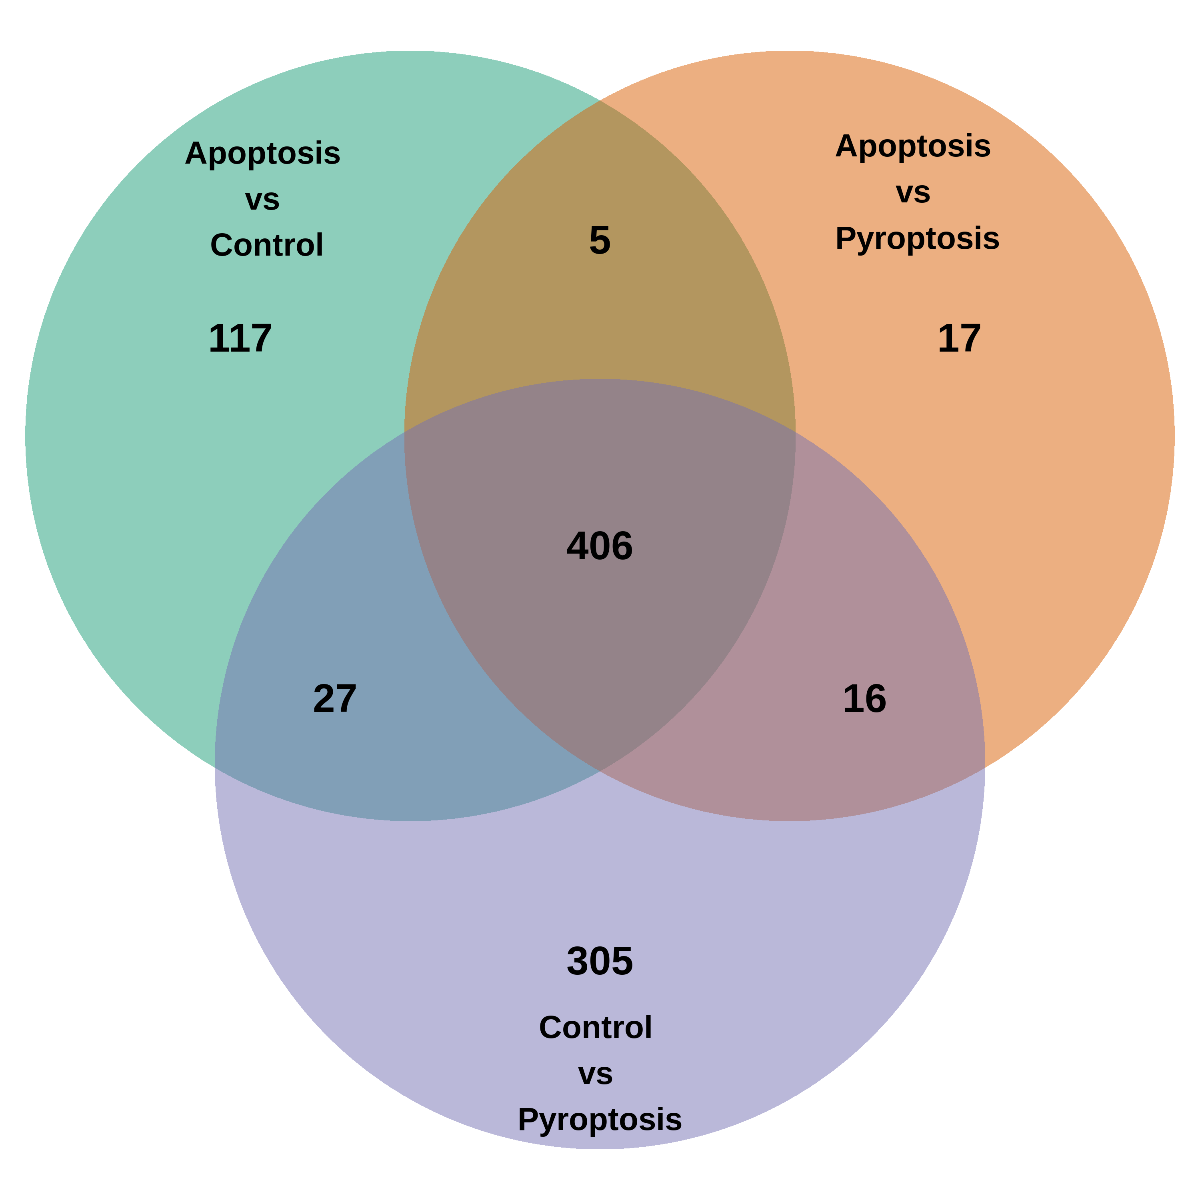

In [12]:
# read in the venn diagram from PNG
venn_diagram_image_path = file.path(paste0("figures/",cell_type,"_venn_diagram.png"))
venn_diagram_image = png::readPNG(venn_diagram_image_path)
# plot the montage image to a ggplot object
venn_diagram_image <- (
    ggplot()
    + annotation_custom(
        rasterGrob(venn_diagram_image, interpolate = TRUE),
        xmin=-Inf, xmax=Inf, ymin=-Inf, ymax=Inf
    )
    + theme_void()
)
# get the type of the object
class(venn_diagram_image)
venn_diagram_image


### Find the unique features for each class 
### Fins the overlapping features between classes

In [13]:
# add sets together
a_h__a_p <- union(a_h_list, a_p_list)
a_h__h_p <- union(a_h_list ,h_p_list)
a_p__h_p <- union(a_p_list ,h_p_list)

# get the unique features for each set
# Apoptosis_vs_Control
# should be 117
a_h_unique <- setdiff(a_h_list, a_p__h_p)
length(a_h_unique)

# Apoptosis_vs_Pyroptosis
# should be 17
a_p_unique <- setdiff(a_p_list, a_h__h_p)
length(a_p_unique)

# Control_vs_Pyroptosis
# should be 305
h_p_unique <- setdiff(h_p_list, a_h__a_p)
length(h_p_unique)


# get the common features for each set
# Apoptosis_vs_Control and Apoptosis_vs_Pyroptosis
# should be 5
a_h__a_p_common <- intersect(a_h_list, a_p_list)
a_h__a_p_common <- setdiff(a_h__a_p_common, h_p_list)
length(a_h__a_p_common)

# Apoptosis_vs_Control and Control_vs_Pyroptosis
# should be 27
a_h__h_p_common <- intersect(a_h_list, h_p_list)
a_h__h_p_common <- setdiff(a_h__h_p_common, a_p_list)
length(a_h__h_p_common)

# Apoptosis_vs_Pyroptosis and Control_vs_Pyroptosis
# should be 16
a_p__h_p_common <- intersect(a_p_list, h_p_list)
a_p__h_p_common <- setdiff(a_p__h_p_common, a_h_list)
length(a_p__h_p_common)

# all three set intersection
# should be 406
a_h__a_p__h_p_common <- intersect(a_h_list, a_p_list)
a_h__a_p__h_p_common <- intersect(a_h__a_p__h_p_common, h_p_list)
length(a_h__a_p__h_p_common)


[1] 117

[1] 17

[1] 305

[1] 5

[1] 27

[1] 16

[1] 406

#### Get df ready for plotting

In [14]:
anova_results_channels <- anova_results %>%
    # dplyr::arrange(desc(abs(group))) %>%
    tidyr::separate(
        features,
        into = c(
            "compartment",
            "feature_group",
            "measurement",
            "channel", 
            "parameter1", 
            "parameter2"
        ),
        sep = "_",
        remove = FALSE
    ) %>%
    dplyr::mutate(channel_cleaned = channel)
    # dplyr::arrange(desc(abs(group)))

# Clean channel for visualization
anova_results_channels$channel_learned <- dplyr::recode(anova_results_channels$channel_cleaned,
        "CorrDNA" = "nuclei",
        "CorrMito" = "Mito",
        "CorrER" = "ER",
        "CorrGasdermin" = "gasdermin",
        "CorrPM" = "PM",
        .default = "other",
        .missing="other"
    )
# rename the values in channel learned
anova_results_channels$channel_learned <- dplyr::recode(anova_results_channels$channel_learned,
        "nuclei" = "Nuclei",
        "Mito" = "Mito",
        "ER" = "ER",
        "gasdermin" = "GasderminD",
        "PM" = "AGP",
        .default = "other",
        .missing="Other"
    )
anova_results_channels$channel_learned <- factor(anova_results_channels$channel_learned, levels = c("Nuclei","Mito","ER","GasderminD","AGP","Other"))


Warning message:
“Expected 6 pieces. Additional pieces discarded in 154 rows [529, 530, 531, 532,
533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548,
...].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 429 rows [1, 2, 3, 4, 5,
6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


In [15]:
# select specfic colors from the color palette
DAPI <- brewer.pal(12,"Paired")[2]
ER <- brewer.pal(12,"Paired")[4]
Gasdermin <- brewer.pal(12,"Paired")[8]
PM <- brewer.pal(12,"Paired")[6]
Mito <- brewer.pal(12,"Paired")[10]
Other <- brewer.pal(8, "Accent")[8]


In [16]:
# set plot size
width <- 10
height <- 10
options(repr.plot.width=width, repr.plot.height=height)
unique_feature_plot_function <- function(df, list_of_unique_features){
    filtered_df <- df %>% filter(features %in% list_of_unique_features)
    # count the data
    filtered_df_counts <- count(filtered_df, channel_learned)
    # make <NA> vlues in channel_learned Other
    filtered_df_counts$channel_learned <- replace_na(filtered_df_counts$channel_learned, "Other")
    plot <- (
        ggplot(filtered_df_counts, aes(x=channel_learned, y=n, fill=channel_learned))
        + geom_bar(stat = "identity")
        + theme_bw()
        # change colours of bars manually
        + scale_fill_manual(values = c("Nuclei" = DAPI, "Mito" = Mito, "ER" = ER, "GasderminD" = Gasdermin, "AGP" = PM, "Other" = Other))
        + labs(
            x = "Channel",
            y = "Number of Features",
        )
        # legend title change
        
        + guides(fill = guide_legend(title = "Channel"))
        + figure_theme
        # drop the x axis ticks
        + theme(
            axis.text.x = element_blank(),
            axis.ticks.x = element_blank()
        )
        
    )
    plot <- plot + scale_x_discrete(drop = FALSE)
    return(plot)
}

# subset and plot the unique features for each set in the list
# a_h_unique
# a_p_unique
# h_p_unique
# a_h__a_p_common
# a_h__h_p_common
# a_p__h_p_common
# a_h__a_p__h_p_common


a_h_unique_plot <- unique_feature_plot_function(anova_results_channels, a_h_unique)
a_p_unique_plot <- unique_feature_plot_function(anova_results_channels, a_p_unique)
h_p_unique_plot <- unique_feature_plot_function(anova_results_channels, h_p_unique)
a_h__a_p_common_plot <- unique_feature_plot_function(anova_results_channels, a_h__a_p_common)
a_h__h_p_common_plot <- unique_feature_plot_function(anova_results_channels, a_h__h_p_common)
a_p__h_p_common_plot <- unique_feature_plot_function(anova_results_channels, a_p__h_p_common)
a_h__a_p__h_p_common_plot <- unique_feature_plot_function(anova_results_channels, a_h__a_p__h_p_common)

# add titles to each plot
a_h_unique_plot <- a_h_unique_plot + labs(title = "Apoptosis vs Control")
a_p_unique_plot <- a_p_unique_plot + labs(title = "Apoptosis vs Pyroptosis")
h_p_unique_plot <- h_p_unique_plot + labs(title = "Control vs Pyroptosis")
a_h__a_p_common_plot <- a_h__a_p_common_plot + labs(title = "Common Features in Apoptosis vs Control and Apoptosis vs Pyroptosis")
a_h__h_p_common_plot <- a_h__h_p_common_plot + labs(title = "Common Features in Apoptosis vs Control and Control vs Pyroptosis")
a_p__h_p_common_plot <- a_p__h_p_common_plot + labs(title = "Common Features in Apoptosis vs Pyroptosis and Control vs Pyroptosis")
a_h__a_p__h_p_common_plot <- a_h__a_p__h_p_common_plot + labs(title = "Common Features in Apoptosis vs Control, Apoptosis vs Pyroptosis and Control vs Pyroptosis")


In [17]:
cell_umap_path <- file.path(paste0(
    "../","../","1.Exploratory_Data_Analysis/results/",cell_type,"_umap_values_morphology_all_cells.parquet"
))

cell_umap <- arrow::read_parquet(cell_umap_path)
head(cell_umap)


Cytoplasm_AreaShape_Compactness Cytoplasm_AreaShape_Eccentricity
1  0.09913429                     -0.9892539                      
2  0.25248645                      0.8018996                      
3 -1.20653889                     -1.5087519                      
4  1.50801705                      1.4192669                      
5 -0.04922150                     -0.7087415                      
6 -0.17782191                     -0.3350535                      
  Cytoplasm_AreaShape_Extent Cytoplasm_AreaShape_FormFactor
1  1.0469124                 -0.4292652                    
2  0.3428945                 -0.5611980                    
3  1.8451901                  1.8581669                    
4 -0.9139938                 -1.2722049                    
5  0.1227881                 -0.2866189                    
6 -0.1044180                 -0.1489127                    
  Cytoplasm_AreaShape_MajorAxisLength Cytoplasm_AreaShape_MinorAxisLength
1  0.03995555                          1.2751962                         
2  4.32092738                          2.9708813                         
3 -0.90096003                          0.2153558                         
4  3.17484997                         -0.6463060                         
5  0.37476428                          1.5096639                         
6  0.70645323                          1.5723319                         
  Cytoplasm_AreaShape_Orientation Cytoplasm_AreaShape_Zernike_0_0
1  1.3458522                       1.44588602                    
2  0.7841219                      -0.47638729                    
3 -1.2148057                       1.62264544                    
4  0.1083987                      -1.81686393                    
5  0.5787963                       0.40670364                    
6 -0.2771412                      -0.02550445                    
  Cytoplasm_AreaShape_Zernike_1_1 Cytoplasm_AreaShape_Zernike_2_0 ⋯
1 -0.5000572                       1.01968836                     ⋯
2  0.4848230                      -0.03728282                     ⋯
3  0.3772434                       2.08172361                     ⋯
4 -0.5750030                      -1.33666849                     ⋯
5  0.9359895                       0.41471398                     ⋯
6  1.4585851                       0.49466660                     ⋯
  Nuclei_Texture_InverseDifferenceMoment_CorrPM_3_00_256
1  0.4906864                                            
2  0.2848144                                            
3 -0.1037291                                            
4 -1.2353030                                            
5  0.3713184                                            
6  1.8052705                                            
  Nuclei_Texture_InverseDifferenceMoment_CorrPM_3_02_256
1  0.04765855                                           
2  0.20148205                                           
3  0.11071728                                           
4 -0.69339624                                           
5  0.62963223                                           
6  2.16857859                                           
  Nuclei_Texture_SumEntropy_CorrPM_3_01_256
1 -0.3427023                               
2 -0.2615170                               
3  0.5943098                               
4  0.4712619                               
5 -0.3730945                               
6 -2.5171624                               
  Nuclei_Texture_SumVariance_CorrGasdermin_3_01_256
1 -0.06918120                                      
2 -0.02537835                                      
3 -0.06741233                                      
4 -0.03949346                                      
5 -0.04659583                                      
6 -0.06271633                                      
  Nuclei_Texture_SumVariance_CorrMito_3_03_256
1 -0.07433708                                 
2 -0.10781425                                 
3 -0.12600345                                 

In [18]:
# rename the treatment names
cell_umap <- cell_umap %>%
    mutate(oneb_Metadata_Treatment_Dose_Inhibitor_Dose = case_when(
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='DMSO_0.100_%_DMSO_0.025_%' ~ "DMSO 0.1% - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='DMSO_0.100_%_DMSO_1.000_%' ~ "DMSO 0.1% - DMSO 1.0%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='DMSO_0.100_%_Z-VAD-FMK_100.000_uM' ~ "DMSO 0.1% - Z-VAD-FMK 100.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='DMSO_0.100_%_Z-VAD-FMK_30.000_uM' ~ "DMSO 0.1% - Z-VAD-FMK 30.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Flagellin_1.000_ug_per_ml_DMSO_0.025_%' ~ "Flagellin 1.0 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Flagellin_1.000_ug_per_ml_Disulfiram_1.000_uM' ~ "Flagellin 1.0 ug/ml - Disulfiram 1.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_0.010_ug_per_ml_DMSO_0.025_%' ~ "LPS 0.01 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_0.100_ug_per_ml_DMSO_0.025_%' ~ "LPS 0.1 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Flagellin_0.100_ug_per_ml_DMSO_0.0_%' ~ "Flagellin 0.1 ug/ml - DMSO 0.0%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Flagellin_0.100_ug_per_ml_DMSO_0.025_%' ~ "Flagellin 0.1 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Disulfiram_0.100_uM_DMSO_0.025_%' ~ "Disulfiram 0.1 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_1.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_10.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Disulfiram_1.000_uM' ~ "LPS 1.0 ug/ml + Nigericin 10.0 uM - Disulfiram 1.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Z-VAD-FMK_100.000_uM' ~ "LPS 1.0 ug/ml + Nigericin 10.0 uM - Z-VAD-FMK 100.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_3.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_1.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 1.0 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Flagellin_1.000_ug_per_ml_DMSO_0.0_%' ~ "Flagellin 1.0 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Disulfiram_1.000_uM_DMSO_0.025_%' ~ "Disulfiram 1.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Thapsigargin_1.000_uM_DMSO_0.025_%' ~ "Thapsigargin 1.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Topotecan_10.000_nM_DMSO_0.025_%' ~ "Topotecan 10.0 nM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 10.0 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_Disulfiram_0.100_uM' ~ "LPS 10.0 ug/ml - Disulfiram 0.1 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_Disulfiram_1.000_uM' ~ "LPS 10.0 ug/ml - Disulfiram 1.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_Disulfiram_2.500_uM' ~ "LPS 10.0 ug/ml - Disulfiram 2.5 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_Z-VAD-FMK_100.000_uM' ~ "LPS 10.0 ug/ml - Z-VAD-FMK 100.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Thapsigargin_10.000_uM_DMSO_0.025_%' ~ "Thapsigargin 10.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_nM_DMSO_0.025_%' ~ "H2O2 100.0 nM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_100.000_ug_per_ml_1.000_uM_DMSO_0.025_%' ~ "LPS 100.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_100.000_ug_per_ml_10.000_uM_DMSO_0.025_%' ~ "LPS 100.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_100.000_ug_per_ml_3.000_uM_DMSO_0.025_%' ~ "LPS 100.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_100.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 100.0 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_uM_DMSO_0.025_%' ~ "H2O2 100.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_uM_Disulfiram_1.000_uM' ~ "H2O2 100.0 uM - Disulfiram 1.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_uM_Z-VAD-FMK_100.000_uM' ~ "H2O2 100.0 uM - Z-VAD-FMK 100.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Disulfiram_2.500_uM_DMSO_0.025_%' ~ "Disulfiram 2.5 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Topotecan_20.000_nM_DMSO_0.025_%' ~ "Topotecan 20.0 nM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Topotecan_5.000_nM_DMSO_0.025_%' ~ "Topotecan 5.0 nM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='media_ctr_0.0_0_Media_ctr_0.0_0' ~ "Media ctr 0.0 0",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='media_ctr_0.0_0_Media_0.0_0' ~ "Media ctr 0.0 0"
    ))


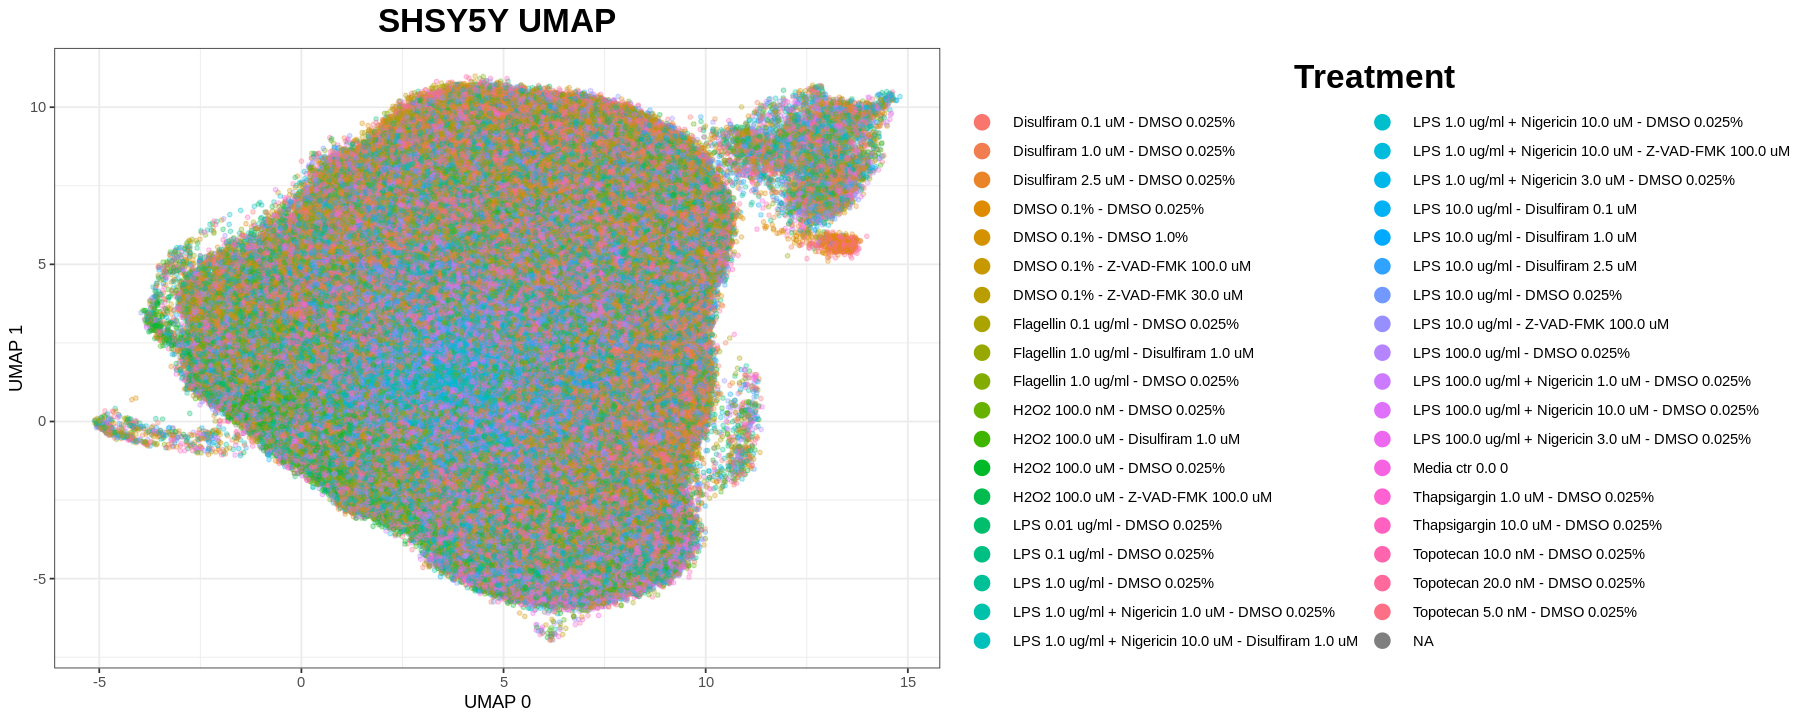

In [19]:
# set plot size 
width <- 15
height <- 6
options(repr.plot.width = width, repr.plot.height = height)
umap_plot_all <- (
    ggplot(cell_umap, aes(x = umap_1, y = umap_2)) 

    + geom_point(
        aes(
            color = oneb_Metadata_Treatment_Dose_Inhibitor_Dose
        ), 
        size = 1, 
        alpha = 0.3
    )
    + theme_bw()
    + guides(
        color = guide_legend(
            override.aes = list(
                size = 4,
                alpha = 1
            )
        )
    )
    + labs(
        x = "UMAP 0",
        y = "UMAP 1",
        color = "Treatment"
    )
    + ggtitle(
        paste0(
            cell_type,
            " UMAP"
        ),
    )
    + theme(
        # change title size
        plot.title = element_text(
            size = 20,
            face = "bold",
            hjust = 0.5
        ),
        legend.title = element_text(
            size = 20,
            face = "bold",
            hjust = 0.5
        ),
    )
)
umap_plot_legend <- get_legend(umap_plot_all)
# umap_plot <- umap_plot + theme(legend.position = "none")
umap_plot_all


In [20]:
# re-read in the cell_umap df
cell_umap_path <- file.path(paste0(
    "../","../","1.Exploratory_Data_Analysis/results/",cell_type,"_umap_values_morphology_all_cells.parquet"
))

cell_umap <- arrow::read_parquet(cell_umap_path)
toml_path <- file.path("..","..","1.Exploratory_Data_Analysis/utils/params.toml")
p <- parseTOML(toml_path)
# get the list that is in the toml file under the key "treatments"
# define that list as a variable called list_of_treatments and print the list to verify
list_of_treatments <- c(p$list_of_treatments$treatments)
# subset the df by the list of treatments
cell_umap_selected_treatments <- cell_umap %>% filter(oneb_Metadata_Treatment_Dose_Inhibitor_Dose %in% list_of_treatments)
head(cell_umap_selected_treatments)


Cytoplasm_AreaShape_Compactness Cytoplasm_AreaShape_Eccentricity
1  0.25248645                      0.8018996                      
2  1.50801705                      1.4192669                      
3 -0.64875754                     -0.1010924                      
4 -0.09408633                     -1.4489825                      
5  0.60169295                     -0.3101814                      
6 -0.57698656                     -0.5455632                      
  Cytoplasm_AreaShape_Extent Cytoplasm_AreaShape_FormFactor
1  0.3428945                 -0.5611980                    
2 -0.9139938                 -1.2722049                    
3  1.0401412                  0.5091776                    
4  0.2226912                 -0.2401735                    
5 -0.9934033                 -0.8146829                    
6  0.4111597                  0.3892349                    
  Cytoplasm_AreaShape_MajorAxisLength Cytoplasm_AreaShape_MinorAxisLength
1  4.3209274                           2.9708813                         
2  3.1748500                          -0.6463060                         
3  1.4845037                           2.2152063                         
4 -0.8733283                           0.2303088                         
5 -0.7950074                          -0.2969540                         
6 -0.4161198                           0.3471109                         
  Cytoplasm_AreaShape_Orientation Cytoplasm_AreaShape_Zernike_0_0
1  0.7841219                      -0.4763873                     
2  0.1083987                      -1.8168639                     
3  0.9920135                       1.5537602                     
4 -0.6849343                       0.4832282                     
5 -0.6165520                      -0.4114504                     
6  0.1533789                       1.2112765                     
  Cytoplasm_AreaShape_Zernike_1_1 Cytoplasm_AreaShape_Zernike_2_0 ⋯
1  0.4848230                      -0.03728282                     ⋯
2 -0.5750030                      -1.33666849                     ⋯
3  0.3503180                       0.78766254                     ⋯
4 -0.5045410                      -0.64590847                     ⋯
5 -1.4745887                      -0.10628485                     ⋯
6  0.2126553                       0.20357959                     ⋯
  Nuclei_Texture_InverseDifferenceMoment_CorrPM_3_00_256
1  0.2848144                                            
2 -1.2353030                                            
3  0.3366405                                            
4 -0.0426940                                            
5  0.8244877                                            
6  0.1390677                                            
  Nuclei_Texture_InverseDifferenceMoment_CorrPM_3_02_256
1  0.20148205                                           
2 -0.69339624                                           
3  0.58148103                                           
4  0.06788883                                           
5  1.02957934                                           
6  0.05472007                                           
  Nuclei_Texture_SumEntropy_CorrPM_3_01_256
1 -0.2615170                               
2  0.4712619                               
3  0.2932146                               
4 -0.3333299                               
5 -1.2975443                               
6  0.2846006                               
  Nuclei_Texture_SumVariance_CorrGasdermin_3_01_256
1 -0.02537835                                      
2 -0.03949346                                      
3 -0.04752625                                      
4 -0.06650518                                      
5 -0.06911058                                      
6  0.73144654                                      
  Nuclei_Texture_SumVariance_CorrMito_3_03_256
1 -0.10781425                                 
2  0.18757762                                 
3 -0.03512160                                 

In [21]:


# mutate the names of each treatment
cell_umap_selected_treatments <- cell_umap_selected_treatments %>%
    mutate(oneb_Metadata_Treatment_Dose_Inhibitor_Dose = case_when(
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose == "DMSO_0.100_%_DMSO_0.025_%" ~ "DMSO 0.1%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose == "Flagellin_1.000_ug_per_ml_DMSO_0.025_%" ~ "Flagellin 1.0 ug/ml",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_0.010_ug_per_ml_DMSO_0.025_%' ~ "LPS 0.01 ug/ml",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_0.100_ug_per_ml_DMSO_0.025_%' ~ "LPS 0.1 ug/ml",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Flagellin_0.100_ug_per_ml_DMSO_0.025_%' ~ "Flagellin 0.1 ug/ml",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_1.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 1.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_10.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 10.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_3.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 3.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_1.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 1.0 ug/ml",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Thapsigargin_1.000_uM_DMSO_0.025_%' ~ "Thapsigargin 1.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 10.0 ug/ml",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_100.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 100.0 ug/ml",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Thapsigargin_10.000_uM_DMSO_0.025_%' ~ "Thapsigargin 10.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_nM_DMSO_0.025_%' ~ "H2O2 100.0 nM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_uM_DMSO_0.025_%' ~ "H2O2 100.0 uM"
    ))

     


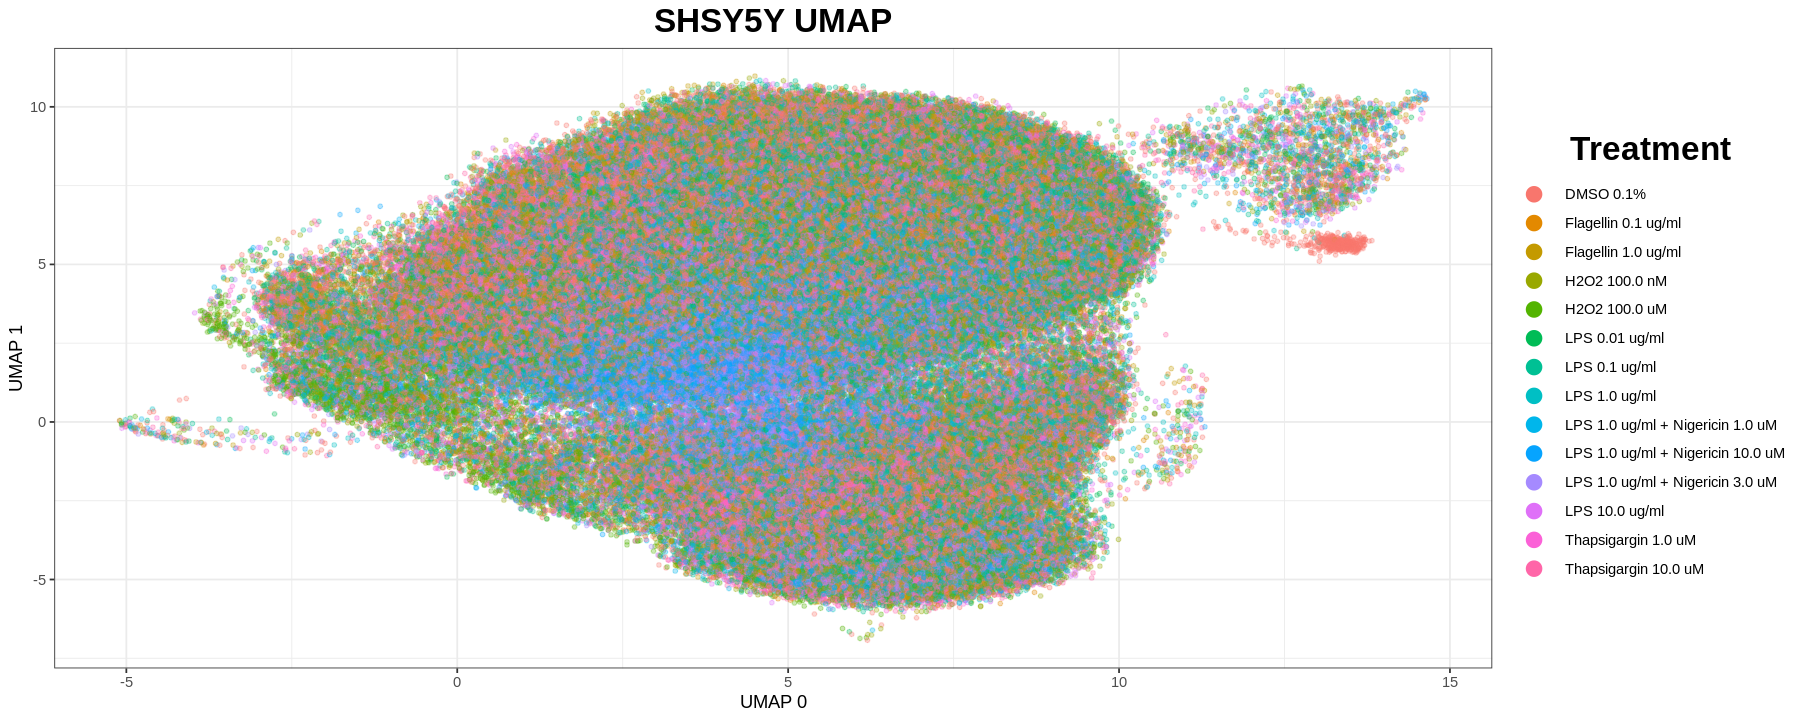

In [22]:
# set plot size 
width <- 15
height <- 6
options(repr.plot.width = width, repr.plot.height = height)
umap_plot_selected <- (
    ggplot(cell_umap_selected_treatments, aes(x = umap_1, y = umap_2)) 

    + geom_point(
        aes(
            color = oneb_Metadata_Treatment_Dose_Inhibitor_Dose
        ), 
        size = 1, 
        alpha = 0.3
    )
    + theme_bw()
    + guides(
        color = guide_legend(
            override.aes = list(
                size = 4,
                alpha = 1
            )
        )
    )
    + labs(
        x = "UMAP 0",
        y = "UMAP 1",
        color = "Treatment"
    )
    + ggtitle(
        paste0(
            cell_type,
            " UMAP"
        ),
    )
    + theme(
        # change title size
        plot.title = element_text(
            size = 20,
            face = "bold",
            hjust = 0.5
        ),
        legend.title = element_text(
            size = 20,
            face = "bold",
            hjust = 0.5
        ),
    )
)
umap_plot_legend <- get_legend(umap_plot_selected)
# umap_plot <- umap_plot + theme(legend.position = "none")
umap_plot_selected


In [23]:
# change bar plot title colours to match the venn diagram

a_h_unique_plot <- a_h_unique_plot + theme(
    plot.title = element_text(
        color=brewer.pal(3, "Dark2")[1], 
        size=14, 
        face="bold", 
        hjust = 0.5
        # remove x axis label

    ),
    axis.title.x = element_blank()
)
a_p_unique_plot <- a_p_unique_plot + theme(
    plot.title = element_text(
        color=brewer.pal(3, "Dark2")[2], 
        size=14, 
        face="bold", 
        hjust = 0.5
        # remove x axis label

    ),
    axis.title.x = element_blank()
)
h_p_unique_plot <- h_p_unique_plot + theme(
    plot.title = element_text(
        color=brewer.pal(3, "Dark2")[3], 
        size=14, 
        face="bold", 
        hjust = 0.5
        # remove x axis label

    ),
    axis.title.x = element_blank()
)
a_h__a_p__h_p_common_plot <- a_h__a_p__h_p_common_plot + ggtitle(
    "All Common Features"
) + theme(
    plot.title = element_text(
        color="black", 
        size=14, 
        face="bold", 
        hjust = 0.5
        # remove x axis label

    ),
    axis.title.x = element_blank()
)


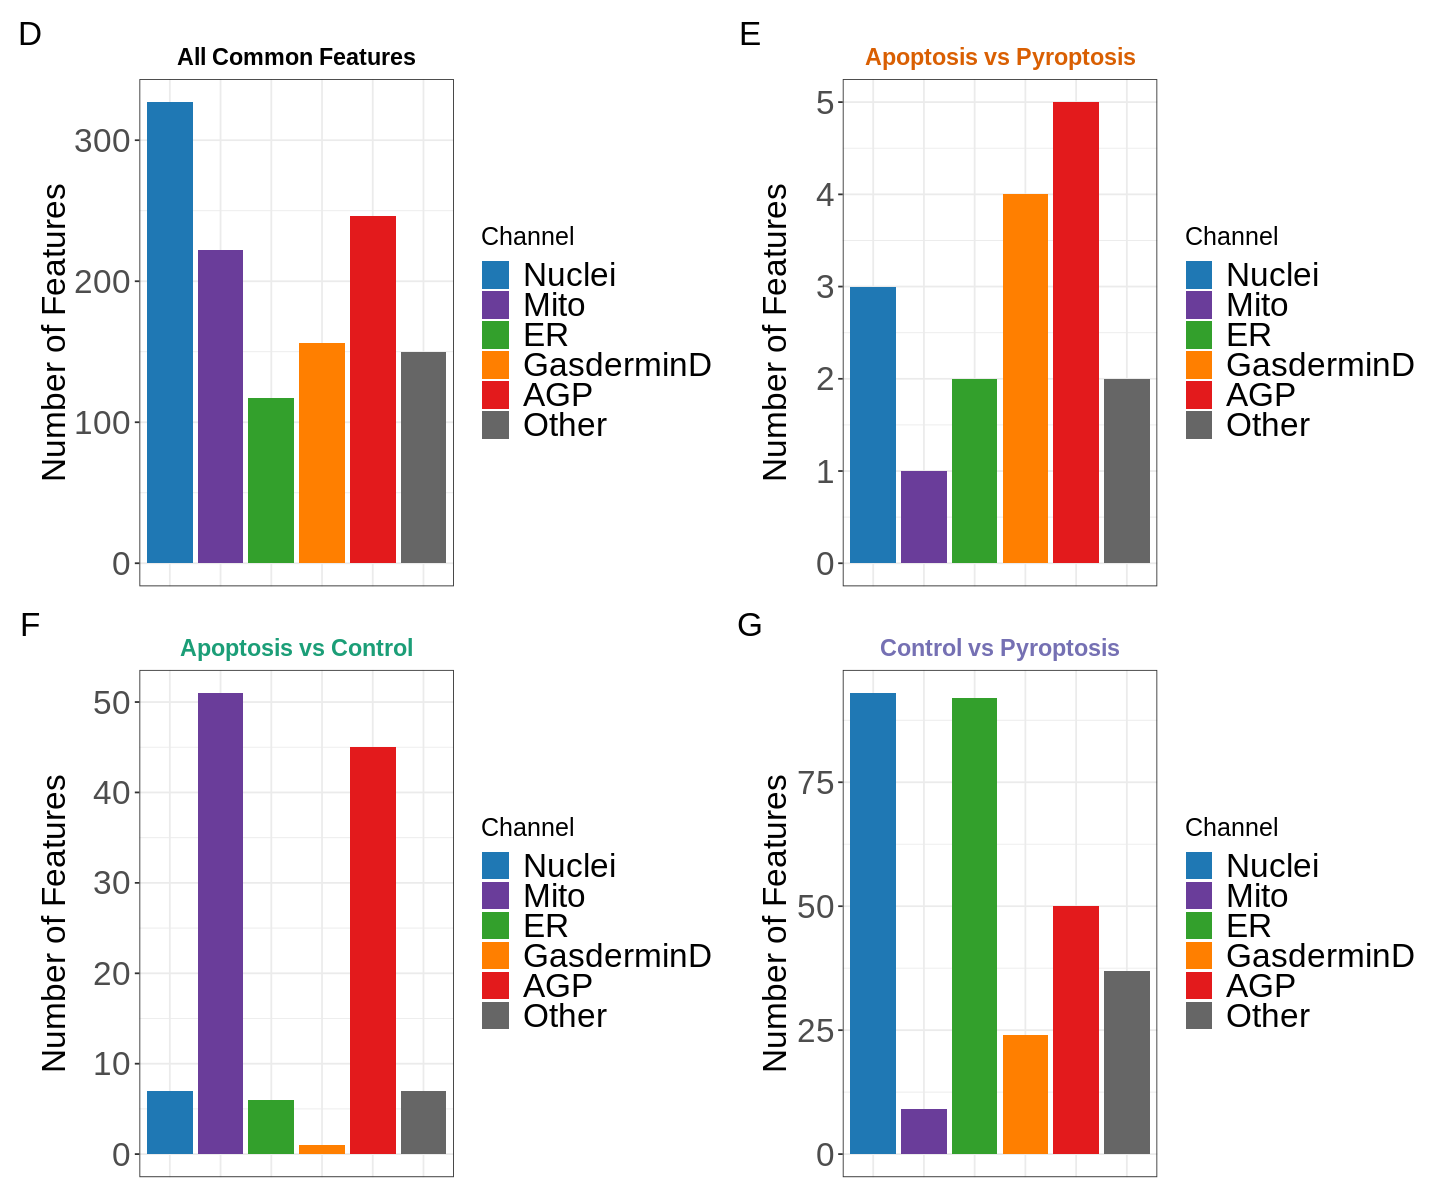

In [24]:
# patch work plot of the venn diagram and bar plots


layout <- c(
    area(t=1, b=2, l=1, r=2), 
    area(t=1, b=2, l=3, r=4), 
    area(t=3, b=4, l=1, r=2), 
    area(t=3, b=4, l=3, r=4)
)

# set plot size
width <- 12
height <- 10
options(repr.plot.width=width, repr.plot.height=height)
sub_figure3 <- (
    a_h__a_p__h_p_common_plot
    + a_p_unique_plot
    + a_h_unique_plot
    
    + h_p_unique_plot
    + plot_layout(design = layout)
    + plot_annotation(tag_levels = list(c( "D", "E", "F", "G"))) & theme(plot.tag = element_text(size = 20))

)
sub_figure3


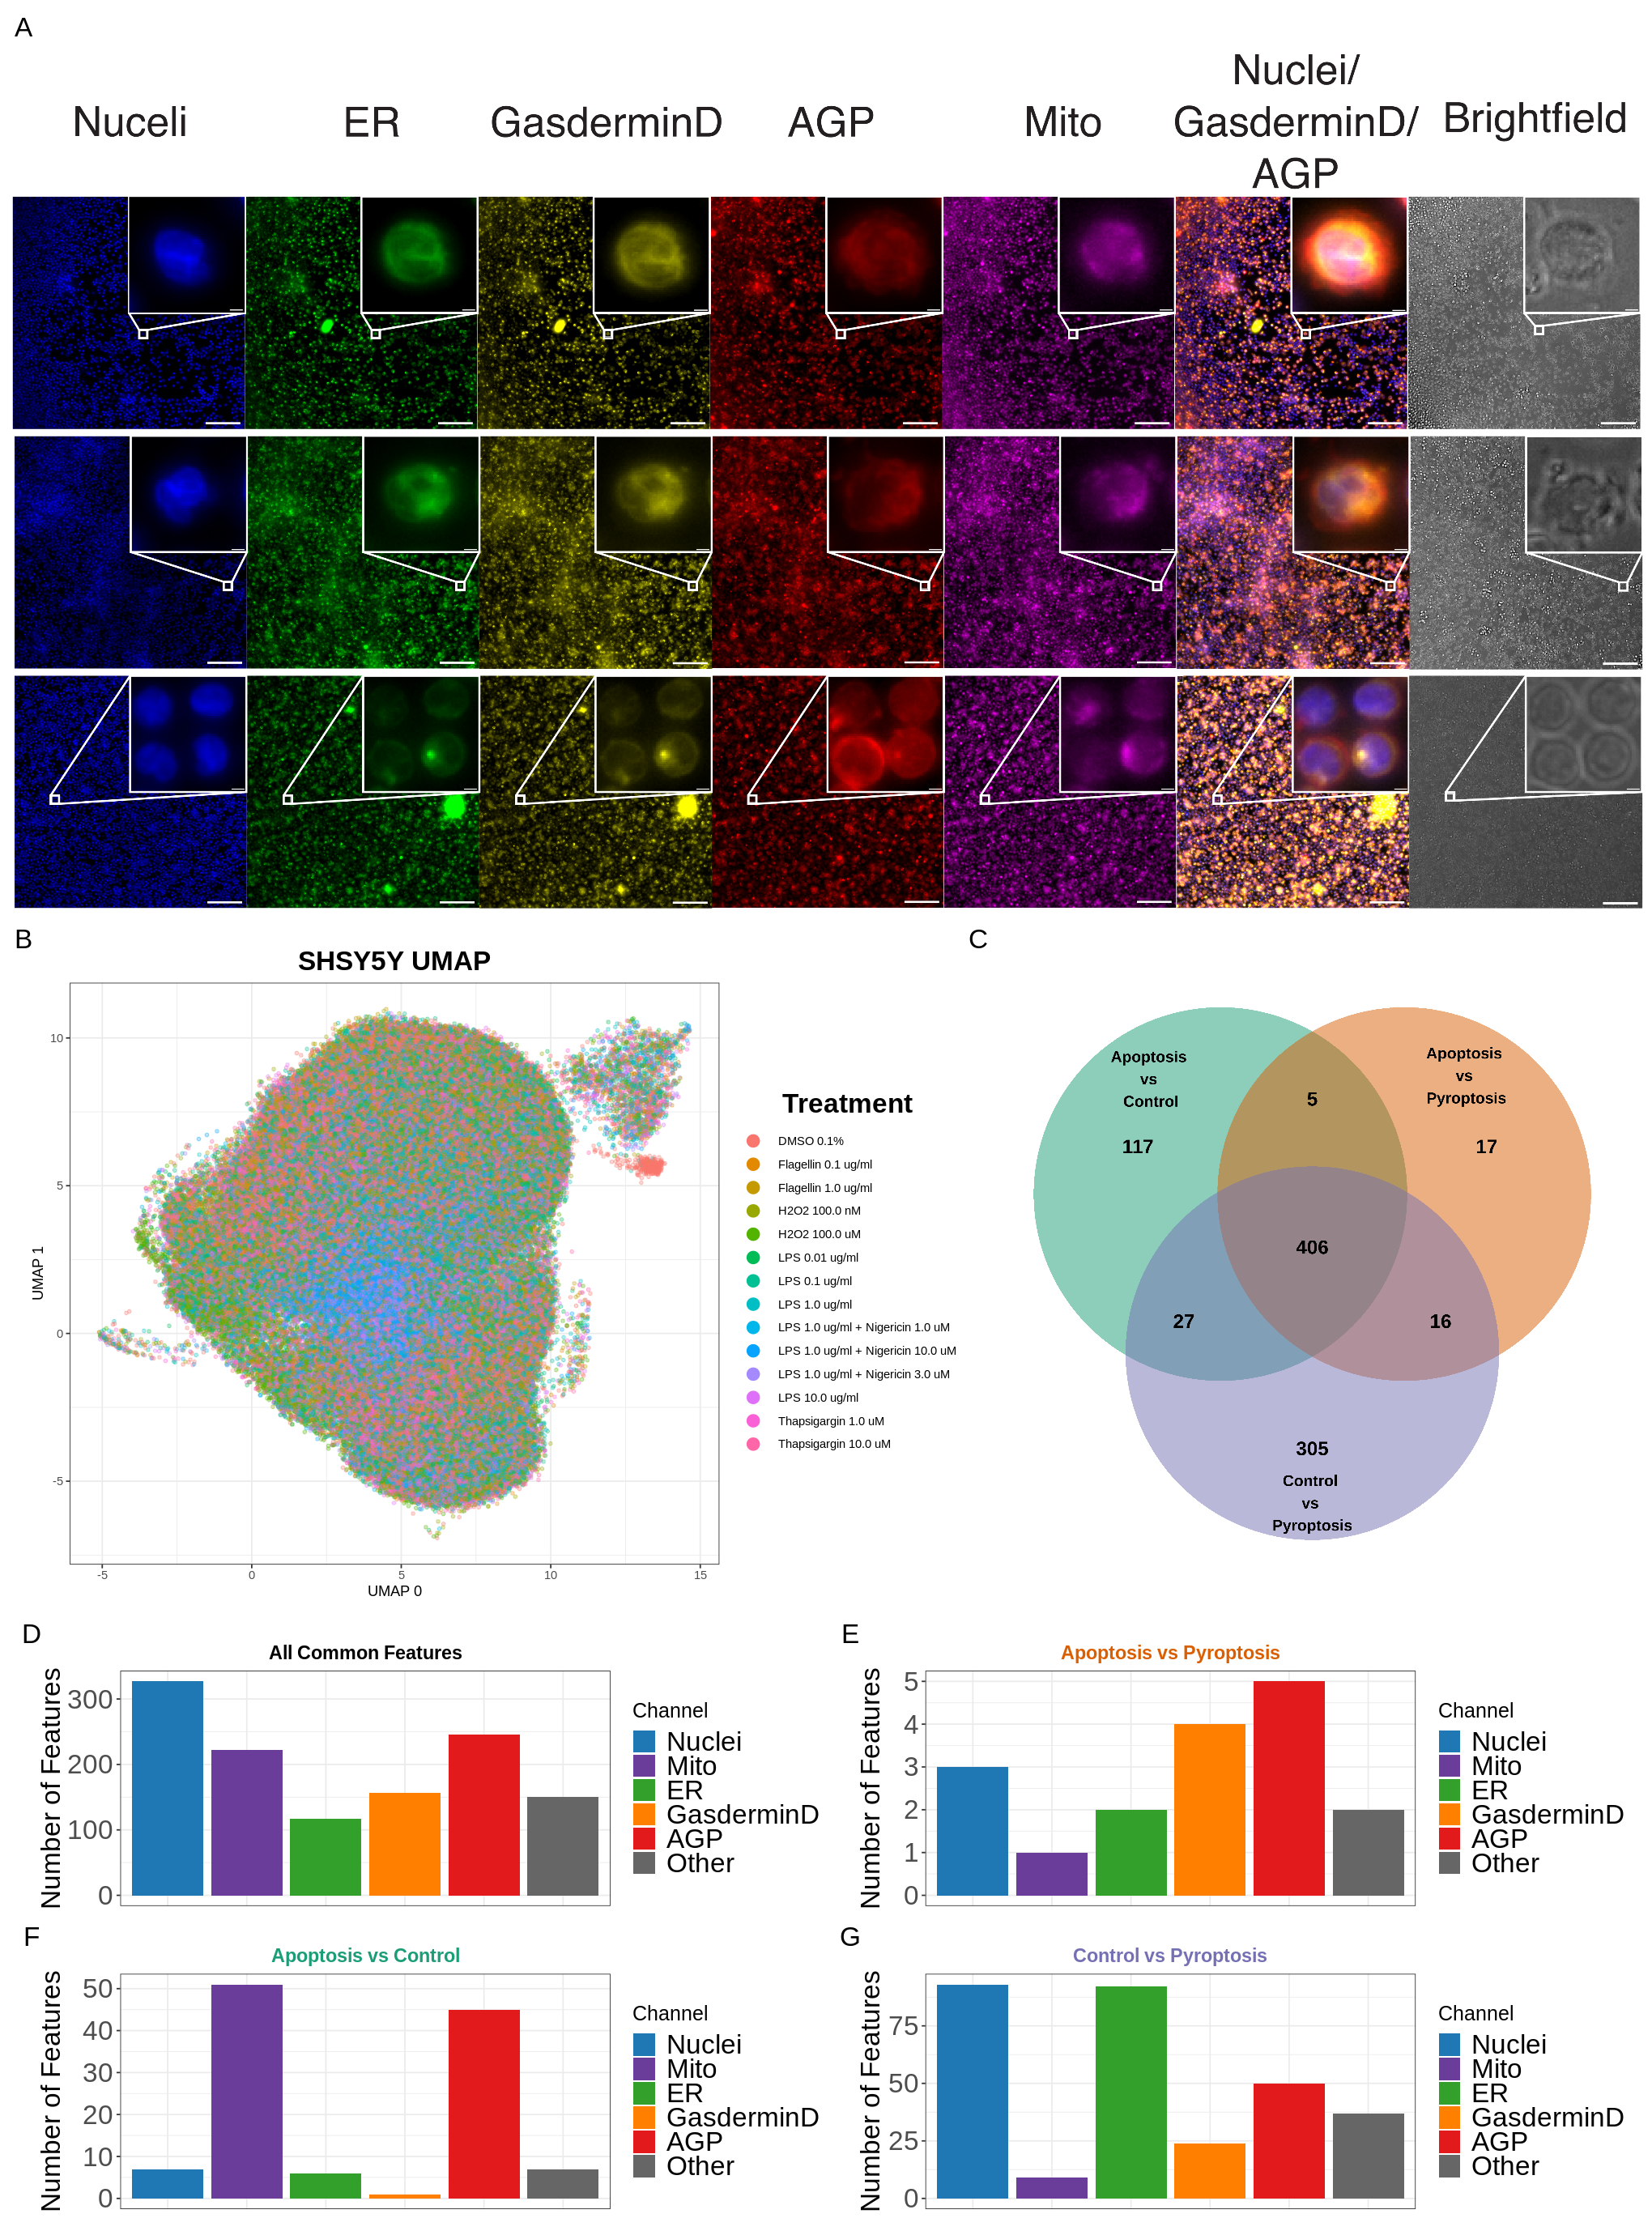

In [25]:
layout <- c(
    area(t=1, b=3, l=1, r=4), 
    area(t=4, b=5, l=1, r=2),
    area(t=4, b=5, l=3, r=4),
    area(t=6, b=7, l=1, r=4)
)

# patch work the plots together
# set plot size
width <- 17
height <- 23
options(repr.plot.width=width, repr.plot.height=height, units = "cm", dpi = 600)

fig3 <- (
    wrap_elements(full = montage)
    # montage
    + umap_plot_selected
    + venn_diagram_image
    + wrap_elements(full = sub_figure3)
    # + sub_figure3
    + plot_layout(design = layout, widths = c(8,8 ))
    # make bottom plot not align
    + plot_annotation(tag_levels = list(c("A", "B", "C"))) & theme(plot.tag = element_text(size = 20))

)
ggsave(
    filename = file.path("figures",paste0(cell_type,"_figure3.png")),
    plot = fig3,
    width = width,
    height = height,
    units = "in",
    dpi = 600
)

fig3


In [26]:
sessionInfo()


R version 4.2.2 (2022-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Pop!_OS 22.04 LTS

Matrix products: default
BLAS/LAPACK: /home/lippincm/miniconda3/envs/Interstellar/lib/libopenblasp-r0.3.24.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggvenn_0.1.10         lubridate_1.9.3       forcats_1.0.0        
 [4] readr_2.1.4           tidyr_1.3.0           tibble_3.2.1         
 [7] tidyverse_2.0.0       VennDiagram_1.7.3     futile.logger_1.4.3  
[10] purrr_1.0.1           stringr_1.5.0         reshape2_1.4.4       